# **Road Traffic Accidents**


In [57]:
import pandas as pd

## Import and Inspect the Data


In [67]:
df = pd.read_csv("drug_side_effect.csv")
df

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Mecozole92,Pfizer Inc.,1993,Antihistamine,Fungal infections,Dry mouth,850,Inhalation,Liver disease,May affect fertility,47.48,Kv961uR,2026-01-20,Moderate,Rejected
1432,Amoxvir17,GlaxoSmithKline,2010,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Inhalation,Diabetes,May affect fertility,235.37,Uc964RO,2027-09-28,Severe,Rejected
1433,Zylovir17,Pfizer Inc.,2007,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Topical,Asthma,Do not operate machinery,145.09,Fq361YH,2026-02-08,Moderate,Rejected
1434,Mecoprofen32,GlaxoSmithKline,1994,Antifungal,Bacterial infections,Headache,670,Topical,Asthma,May cause drowsiness,263.19,qM405ML,2028-05-13,Severe,Pending


## Getting Insights About The Dataset

In [104]:
df.shape

(1436, 13)

In [105]:
df.nunique()


drug_name               1337
manufacturer              10
approval_year             35
drug_class                10
indications               10
side_effects             435
dosage_mg                 99
administration_route       7
contraindications         10
warnings                  10
expiry_date              806
side_effect_severity       3
approval_status            3
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   drug_name             1436 non-null   object
 1   manufacturer          1436 non-null   object
 2   approval_year         1436 non-null   int64 
 3   drug_class            1436 non-null   object
 4   indications           1436 non-null   object
 5   side_effects          1436 non-null   object
 6   dosage_mg             1436 non-null   int64 
 7   administration_route  1436 non-null   object
 8   contraindications     1436 non-null   object
 9   warnings              1436 non-null   object
 10  expiry_date           1436 non-null   object
 11  side_effect_severity  1436 non-null   object
 12  approval_status       1436 non-null   object
dtypes: int64(2), object(11)
memory usage: 146.0+ KB


In [107]:
df.head()


,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,2027-12-28,Moderate,Pending


## Handling Missing Values

In [108]:
missing = df.isnull().any().sum()
missing

np.int64(0)

In [109]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

In [110]:
df.describe()

,approval_year,dosage_mg
count,1436.000000,1436.000000
mean,2006.860028,509.637883
std,10.167067,286.417268
min,1990.000000,10.000000
25%,1998.000000,270.000000
50%,2007.000000,515.000000
75%,2016.000000,760.000000
max,2024.000000,990.000000


KeyError: 'side_effect_severity'

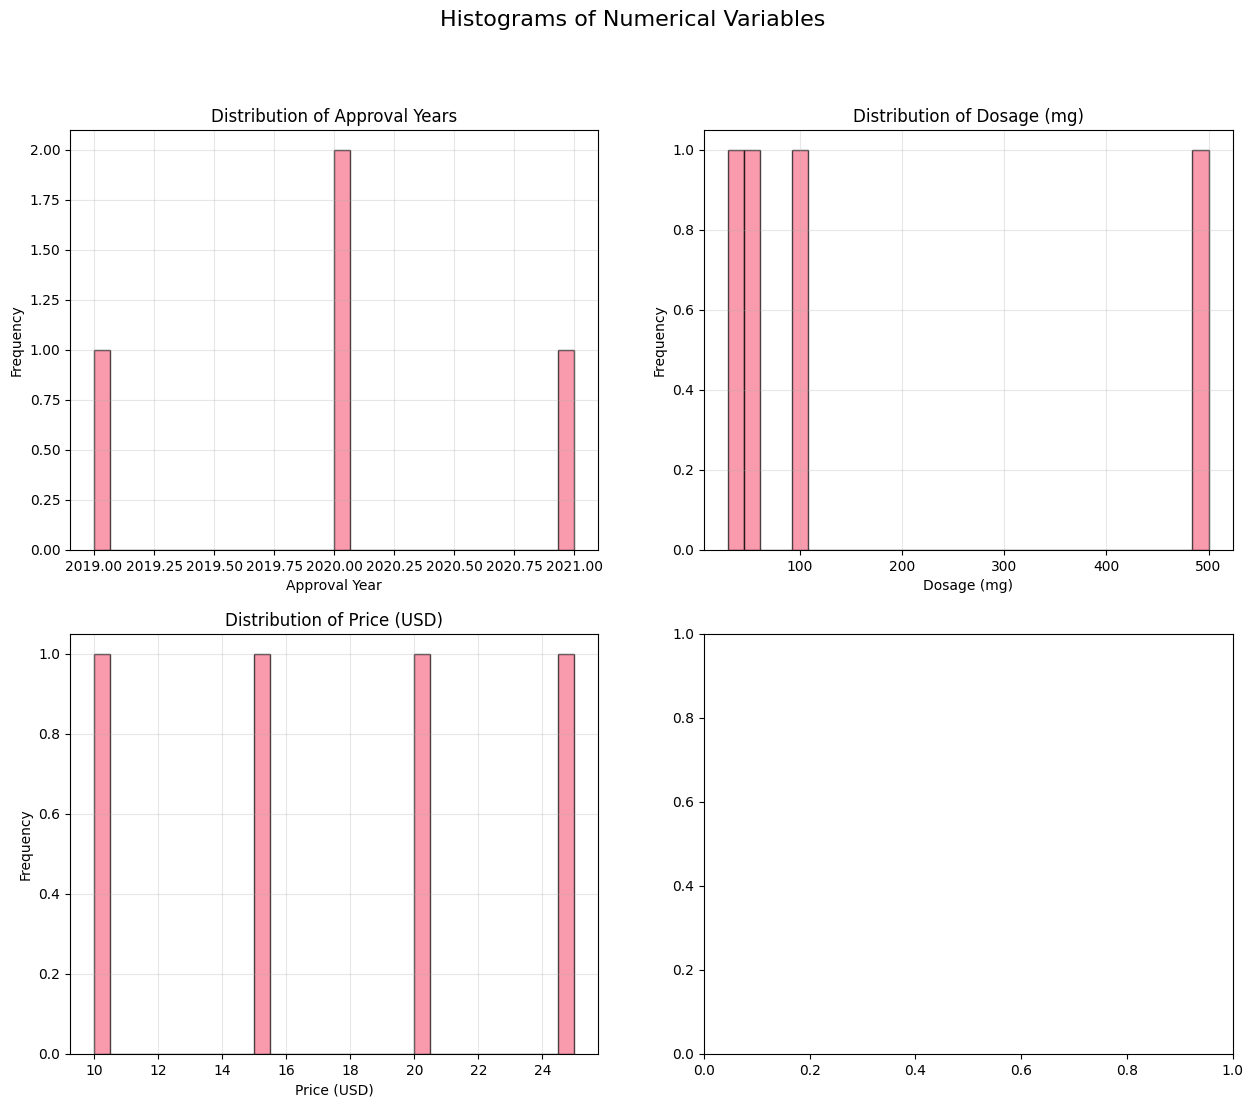

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Histograms of Numerical Variables', fontsize=16)

# Plot histogram for approval_year
axes[0, 0].hist(df['approval_year'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Approval Years')
axes[0, 0].set_xlabel('Approval Year')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Plot histogram for dosage_mg
axes[0, 1].hist(df['dosage_mg'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Dosage (mg)')
axes[0, 1].set_xlabel('Dosage (mg)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Plot histogram for price_usd
axes[1, 0].hist(df['price_usd'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Price (USD)')
axes[1, 0].set_xlabel('Price (USD)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# For side_effect_severity (categorical), create a bar chart instead
severity_counts = df['side_effect_severity'].value_counts()
axes[1, 1].bar(severity_counts.index, severity_counts.values, 
               color=['lightblue', 'lightcoral', 'lightgreen'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of Side Effect Severity')
axes[1, 1].set_xlabel('Severity Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots of Numerical Variables', fontsize=16)

# Box plot for approval_year
axes[0].boxplot(df['approval_year'].dropna())
axes[0].set_title('Box Plot of Approval Years')
axes[0].set_ylabel('Approval Year')

# Box plot for dosage_mg
axes[1].boxplot(df['dosage_mg'].dropna())
axes[1].set_title('Box Plot of Dosage (mg)')
axes[1].set_ylabel('Dosage (mg)')

# Box plot for price_usd
axes[2].boxplot(df['price_usd'].dropna())
axes[2].set_title('Box Plot of Price (USD)')
axes[2].set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()

# Additional analysis: Box plots grouped by side effect severity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots by Side Effect Severity', fontsize=16)

# Dosage by severity
severity_groups = df.groupby('side_effect_severity')['dosage_mg'].apply(list)
axes[0].boxplot(severity_groups.values, labels=severity_groups.index)
axes[0].set_title('Dosage by Severity Level')
axes[0].set_ylabel('Dosage (mg)')

# Price by severity
severity_groups_price = df.groupby('side_effect_severity')['price_usd'].apply(list)
axes[1].boxplot(severity_groups_price.values, labels=severity_groups_price.index)
axes[1].set_title('Price by Severity Level')
axes[1].set_ylabel('Price (USD)')

# Approval year by severity
severity_groups_year = df.groupby('side_effect_severity')['approval_year'].apply(list)
axes[2].boxplot(severity_groups_year.values, labels=severity_groups_year.index)
axes[2].set_title('Approval Year by Severity Level')
axes[2].set_ylabel('Approval Year')

plt.tight_layout()
plt.show()

# Print some basic statistics
print("Basic Statistics:")
print(f"Approval Year Range: {df['approval_year'].min()} - {df['approval_year'].max()}")
print(f"Dosage Range: {df['dosage_mg'].min()}mg - {df['dosage_mg'].max()}mg")
print(f"Price Range: ${df['price_usd'].min():.2f} - ${df['price_usd'].max():.2f}")
print(f"\nSide Effect Severity Counts:")
print(df['side_effect_severity'].value_counts())

In [111]:
columns_to_drop = [ "price_usd", "batch_number"]

df.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,2027-12-28,Moderate,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Mecozole92,Pfizer Inc.,1993,Antihistamine,Fungal infections,Dry mouth,850,Inhalation,Liver disease,May affect fertility,2026-01-20,Moderate,Rejected
1432,Amoxvir17,GlaxoSmithKline,2010,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Inhalation,Diabetes,May affect fertility,2027-09-28,Severe,Rejected
1433,Zylovir17,Pfizer Inc.,2007,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Topical,Asthma,Do not operate machinery,2026-02-08,Moderate,Rejected
1434,Mecoprofen32,GlaxoSmithKline,1994,Antifungal,Bacterial infections,Headache,670,Topical,Asthma,May cause drowsiness,2028-05-13,Severe,Pending


In [112]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to encode
drug_name_column = ['drug_name', 'drug_class', 'side_effects', 'indications', 'approval_status', 'administration_route', 'manufacturer', 'side_effect_severity', 'warnings', 'contraindications' ]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform (no nested [[]])
one_hot_encoded = encoder.fit_transform(df[drug_name_column])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(drug_name_column),
    index=df.index   # keep index aligned
)

# Concatenate with the original DataFrame
df_final = pd.concat([df.drop(drug_name_column, axis=1), encoded_df], axis=1)

df_final


,approval_year,dosage_mg,expiry_date,drug_name_Amoxcillin12,drug_name_Amoxcillin20,drug_name_Amoxcillin24,drug_name_Amoxcillin42,drug_name_Amoxcillin59,drug_name_Amoxcillin60,drug_name_Amoxcillin61,...,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,1996,260,2026-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,470,2027-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,330,2028-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2004,450,2026-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2003,430,2027-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1993,850,2026-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,2010,880,2027-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,2007,960,2026-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,1994,670,2028-05-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
